<a href="https://colab.research.google.com/github/lucasfelipecdm/tech-challenge-fase-1/blob/develop/preprocessing/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento dos dados

Nessa fase faremos o pré-processamento dos dados da base, removeremos outliers, removeremos colunas que não possuem forte relação com o resultado da variavél target ( engargos ), utilizaremos a normalização dos valores e também a transformação de váriaveis categoricas em numéricas.

In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import os

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
plt.figure(figsize=(10,5))

dataset_url = "https://raw.githubusercontent.com/lucasfelipecdm/tech-challenge-fase-1/develop/data/insurance.csv"
dataset = pd.read_csv(dataset_url)
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 1000x500 with 0 Axes>

### Remoção de colunas

Através da nossa [exploração de dados](https://github.com/lucasfelipecdm/tech-challenge-fase-1/blob/develop/exploration/data_exploration.ipynb) podemos observar que a colunas de região e filhoes não tem tanto impacto com o resultado na coluna de Encargos, podemos notar que a coluna de Encargos está fortemente atrelada a váriaveis como idade, IMC e se são fumantes ou não, por isso removeremos ela.

In [52]:
modified_dataset = dataset.copy()
modified_dataset.drop(['region', 'children'], axis = 1, inplace = True)
modified_dataset

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


Pronto, podemos observar acima agora que nossas colunas de gênero e fumante estão com valores numéricos agora, podendo assim serem utilizados no nosso treinamento. Agora prosseguiremos para a separação dos parte de normalização e padronização dos valores passando eles para uma mesma escala.

### Conversão de valores categóricos para numéricos

Através da nossa [exploração de dados](https://github.com/lucasfelipecdm/tech-challenge-fase-1/blob/develop/exploration/data_exploration.ipynb) podemos observar que as colunas de gênero e fumante são valores de texto, ou seja categóricas e não podemos ser utilizadas para treinar nossos modelos, faremos agora a conversão dessas variáveis

In [53]:
dataset_encoded = modified_dataset.copy()
dataset_encoded.head(5)

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


In [54]:
dataset_encoded["sex"] = dataset_encoded["sex"].map({'female': 0, 'male': 1})
dataset_encoded["smoker"] = dataset_encoded["smoker"].map({'no': 0, 'yes': 1})
dataset_encoded.head()

,age,sex,bmi,smoker,charges
0,19,0,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520


### Remoção de outliers

Através da nossa [exploração de dados](https://github.com/lucasfelipecdm/tech-challenge-fase-1/blob/develop/exploration/data_exploration.ipynb) podemos observar também que as colunas de IMC e Encargos possuem alguns outliers, ao invés de *dropalas*, vamos remover os valores extremos na margem superior e inferior

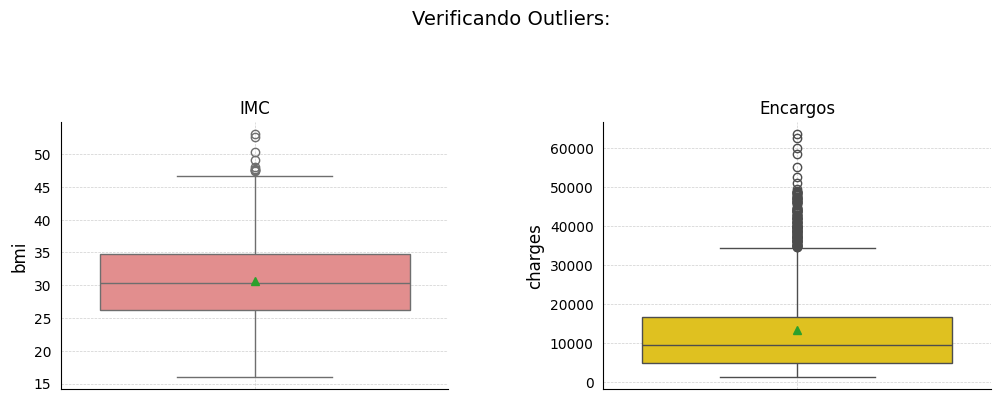

In [55]:
plt.figure(figsize=(12, 8))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(gridspec[0, 0])
sns.boxplot(dataset_encoded['bmi'], ax=ax1, color='lightcoral', showmeans=True)
ax1.set_title('IMC', fontsize=12)

ax2 = plt.subplot(gridspec[0, 1])
sns.boxplot(dataset_encoded['charges'], ax=ax2, color='gold', showmeans=True)
ax2.set_title('Encargos', fontsize=12)

plt.suptitle('Verificando Outliers:', fontsize=14, y=1.02)
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)

plt.tight_layout()

plt.show()

Usaremos uma fórmula comum com o cálculo de amplitude interquartil e margem superior e inferior para remoção de valores discrepantes ( os outliers ):

In [56]:
percentile_25_bmi = dataset_encoded['bmi'].quantile(0.25)
percentile_75_bmi = dataset_encoded['bmi'].quantile(0.75)

iqr_bmi = percentile_75_bmi - percentile_25_bmi

upper_bound_bmi = percentile_75_bmi + 1.5 * iqr_bmi
lower_bound_bmi = percentile_25_bmi - 1.5 * iqr_bmi

print("Margem superior: ",upper_bound_bmi)
print("Margem inferior: ",lower_bound_bmi)

Margem superior:  47.290000000000006
Margem inferior:  13.7


In [57]:
dataset_encoded[dataset_encoded['bmi'] > upper_bound_bmi]

,age,sex,bmi,smoker,charges
116,58,1,49.06,0,11381.32540
286,46,0,48.07,0,9432.92530
401,47,1,47.52,0,8083.91980
543,54,0,47.41,1,63770.42801
847,23,1,50.38,0,2438.05520
860,37,0,47.60,1,46113.51100
1047,22,1,52.58,1,44501.39820
1088,52,1,47.74,0,9748.91060
1317,18,1,53.13,0,1163.46270


In [58]:
dataset_encoded[dataset_encoded['bmi'] < lower_bound_bmi]

,age,sex,bmi,smoker,charges


In [59]:
dataset_outliers = dataset_encoded.copy()

In [60]:
dataset_outliers['bmi'] = np.where(dataset_outliers['bmi'] > upper_bound_bmi,
    upper_bound_bmi, np.where(dataset_outliers['bmi'] < lower_bound_bmi,  lower_bound_bmi,  dataset_outliers['bmi']))

<Figure size 640x480 with 0 Axes>

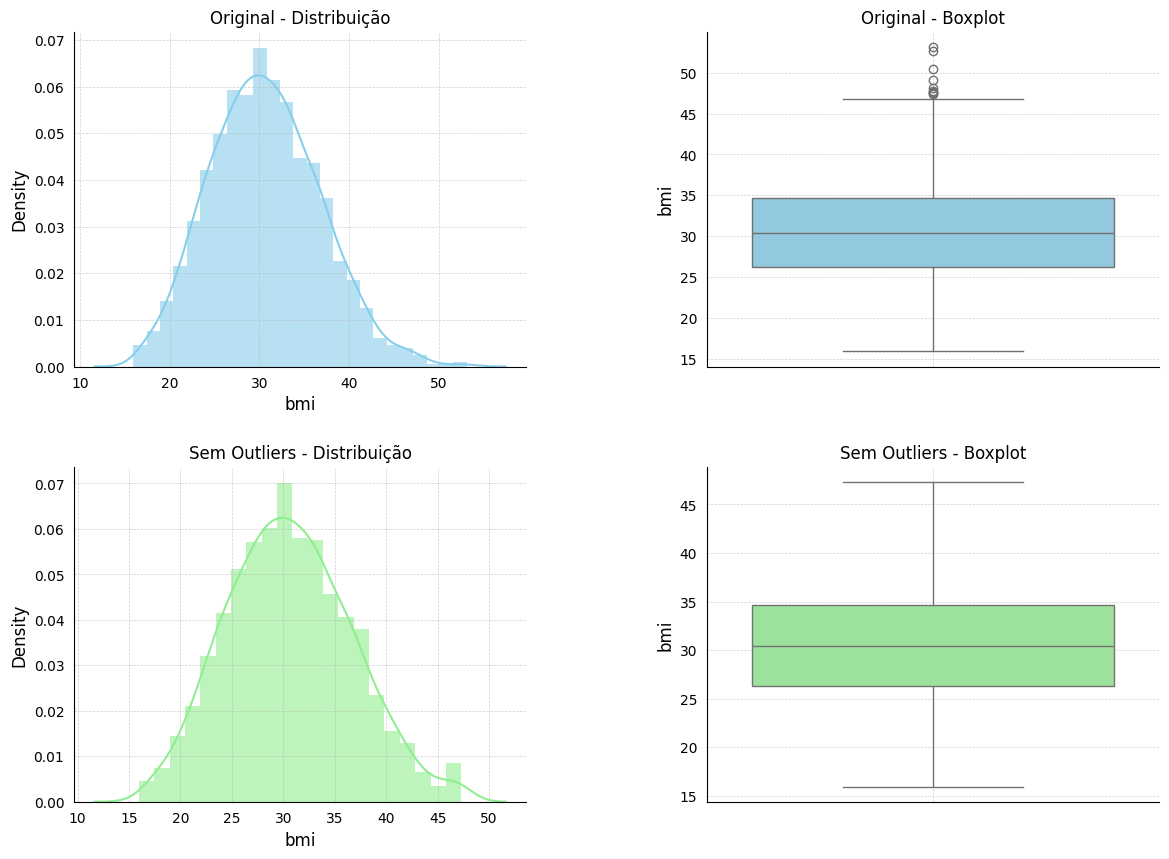

In [61]:
plt.suptitle('Distribuição de IMC antes e depois da remoção dos Outliers', fontsize=14)
plt.figure(figsize=(14, 10))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(gridspec[0, 0])
sns.distplot(dataset['bmi'], color='skyblue', hist_kws={'alpha': 0.6})
ax1.set_title('Original - Distribuição', fontsize=12)

ax2 = plt.subplot(gridspec[0, 1])
sns.boxplot(dataset['bmi'], ax=ax2, color='skyblue')
ax2.set_title('Original - Boxplot', fontsize=12)

ax3 = plt.subplot(gridspec[1, 0])
sns.distplot(dataset_outliers['bmi'], color='lightgreen', hist_kws={'alpha': 0.6})
ax3.set_title('Sem Outliers - Distribuição', fontsize=12)

ax4 = plt.subplot(gridspec[1, 1])
sns.boxplot(dataset_outliers['bmi'], ax=ax4, color='lightgreen')
ax4.set_title('Sem Outliers - Boxplot', fontsize=12)

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)
    plt.tight_layout()

plt.show()

Agora faremos o mesmo tratamento de dados para a coluna de Engargos que é a nossa target.

In [62]:
percentile_25_charges = dataset_encoded['charges'].quantile(0.25)
percentile_75_charges = dataset_encoded['charges'].quantile(0.75)

iqr_charges = percentile_75_charges - percentile_25_charges

upper_bound_charges = percentile_75_charges + 1.5 * iqr_charges
lower_bound_charges = percentile_25_charges - 1.5 * iqr_charges

print("Margem superior: ", upper_bound_charges)
print("Margem inferior: ", lower_bound_charges)

Margem superior:  34489.350562499996
Margem inferior:  -13109.1508975


In [63]:
dataset_encoded[dataset_encoded['charges'] > upper_bound_charges]

,age,sex,bmi,smoker,charges
14,27,1,42.130,1,39611.75770
19,30,1,35.300,1,36837.46700
23,34,0,31.920,1,37701.87680
29,31,1,36.300,1,38711.00000
30,22,1,35.600,1,35585.57600
...,...,...,...,...,...
1300,45,1,30.360,1,62592.87309
1301,62,1,30.875,1,46718.16325
1303,43,1,27.800,1,37829.72420
1313,19,0,34.700,1,36397.57600


In [64]:
dataset_encoded[dataset_encoded['charges'] < lower_bound_charges]

,age,sex,bmi,smoker,charges


In [65]:
dataset_outliers['charges'] = np.where(dataset_outliers['charges'] > upper_bound_charges,
    upper_bound_charges, np.where(dataset_outliers['charges'] < lower_bound_charges,  lower_bound_charges,  dataset_outliers['charges']))

<Figure size 640x480 with 0 Axes>

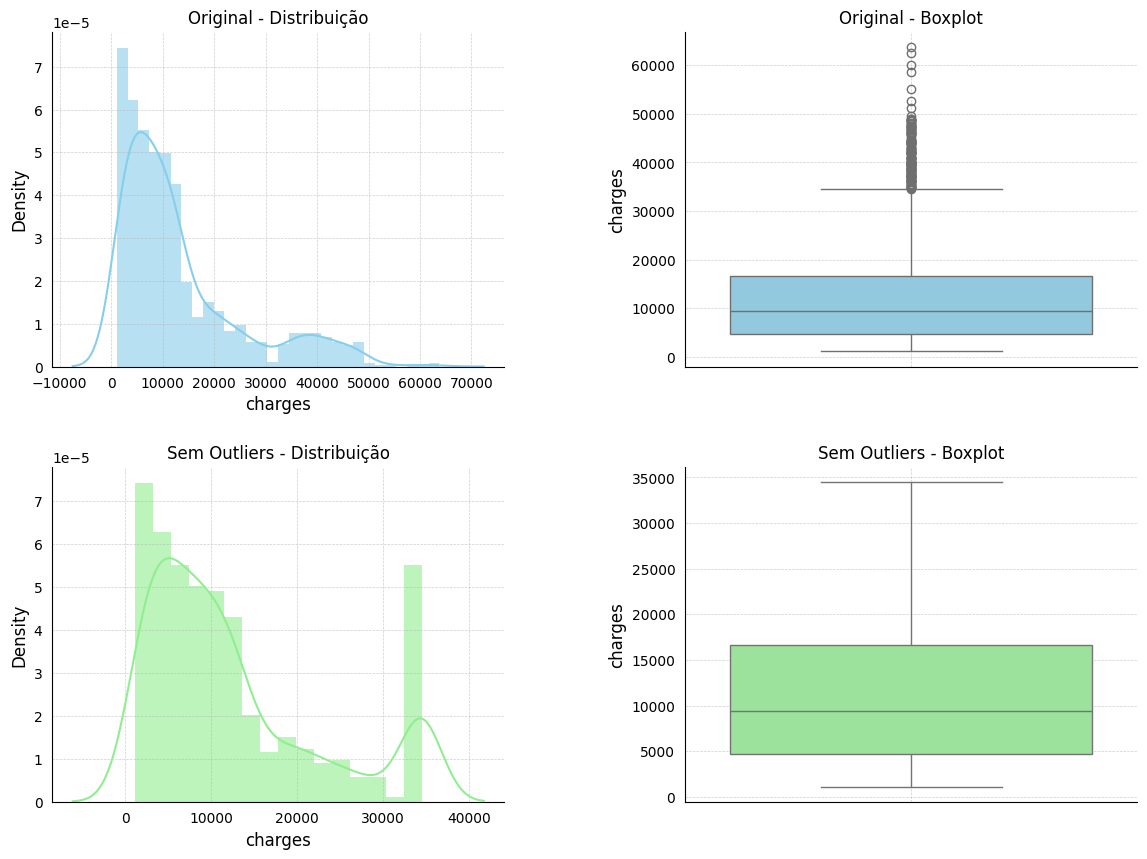

In [66]:
plt.suptitle('Distribuição de Encargos antes e depois da remoção dos Outliers', fontsize=14)
plt.figure(figsize=(14, 10))
gridspec = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

ax1 = plt.subplot(gridspec[0, 0])
sns.distplot(dataset['charges'], color='skyblue', hist_kws={'alpha': 0.6})
ax1.set_title('Original - Distribuição', fontsize=12)

ax2 = plt.subplot(gridspec[0, 1])
sns.boxplot(dataset['charges'], ax=ax2, color='skyblue')
ax2.set_title('Original - Boxplot', fontsize=12)

ax3 = plt.subplot(gridspec[1, 0])
sns.distplot(dataset_outliers['charges'], color='lightgreen', hist_kws={'alpha': 0.6})
ax3.set_title('Sem Outliers - Distribuição', fontsize=12)

ax4 = plt.subplot(gridspec[1, 1])
sns.boxplot(dataset_outliers['charges'], ax=ax4, color='lightgreen')
ax4.set_title('Sem Outliers - Boxplot', fontsize=12)

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.grid(True, linestyle='--', alpha=0.6, which='both', linewidth=0.5)
    plt.tight_layout()

plt.show()

In [67]:
from google.colab import files
dataset_outliers.to_csv('preprocessed_outliers.csv')
files.download('preprocessed_outliers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
from google.colab import files
dataset_encoded.to_csv('preprocessed.csv')
files.download('preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Acima salvamos duas tabelas, uma com e outra sem os outliers.